In [ ]:
from pathlib import Path
import numpy as np
import cv2
import pandas as pd
from tqdm import tqdm
import PIL.Image as Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from glob import glob
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [ ]:
data = []
labels = []

classes = 43
import os
current_path = os.getcwd()

In [ ]:
for i in range(classes):
    path = os.path.join(current_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path+'\\'+a)
            image = image.resize((32,32))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
labels

In [ ]:
# np.save('training/data',data)
# np.save('training/labels',labels)

In [ ]:
data.shape,labels.shape

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42,shuffle=True,stratify=labels)

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

In [ ]:
Y_test = to_categorical(Y_test,43)
Y_train = to_categorical(Y_train,43)

With the use of categorical we can now define our classes in the following way - 

Cats, Dog, Monkey - [0,1,2]


Cats, Dog, Monkey - [1,0,0],[0,1,0],[0,0,1]

In [ ]:
Y_test[4]

In [87]:
vggnet_model = Sequential()

pretrained_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(32,32,3),
    pooling='max',
    classes=43)

for layer in pretrained_model.layers:
    layer.trainable = False

vggnet_model.add(pretrained_model)
vggnet_model.add(Flatten())
vggnet_model.add(Dense(512,activation='relu'))
vggnet_model.add(Dense(256,activation='relu'))
vggnet_model.add(Dense(43,activation='softmax'))


In [88]:
vggnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 43)                11051     
                                                                 
Total params: 15,119,723
Trainable params: 405,035
Non-trainable params: 14,714,688
_________________________________________________________________


In [89]:
from tensorflow.keras.optimizers import Adam

In [90]:
vggnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

c:\Python\Python395\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [91]:
epochs = 30
history = vggnet_model.fit(X_train,Y_train,validation_split=0.25,epochs=epochs)

Epoch 1/30
736/736 [==============================] - 15s 19ms/step - loss: 1.8251 - accuracy: 0.5597 - val_loss: 1.0799 - val_accuracy: 0.6668
Epoch 2/30
736/736 [==============================] - 13s 18ms/step - loss: 0.8051 - accuracy: 0.7466 - val_loss: 0.8542 - val_accuracy: 0.7465
Epoch 3/30
736/736 [==============================] - 13s 18ms/step - loss: 0.6052 - accuracy: 0.8079 - val_loss: 0.8123 - val_accuracy: 0.7612
Epoch 4/30
736/736 [==============================] - 13s 18ms/step - loss: 0.4753 - accuracy: 0.8450 - val_loss: 0.7920 - val_accuracy: 0.7751
Epoch 5/30
736/736 [==============================] - 13s 18ms/step - loss: 0.4210 - accuracy: 0.8637 - val_loss: 0.7786 - val_accuracy: 0.8008
Epoch 6/30
736/736 [==============================] - 13s 18ms/step - loss: 0.3694 - accuracy: 0.8798 - val_loss: 0.7957 - val_accuracy: 0.8044
Epoch 7/30
736/736 [==============================] - 13s 18ms/step - loss: 0.3107 - accuracy: 0.8982 - val_loss: 0.7471 - val_accuracy:

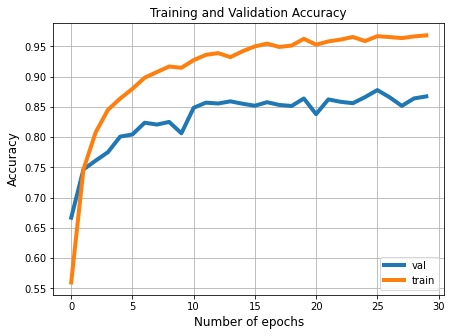

In [92]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_accuracy'],linewidth = 4)
plt.plot(history.history['accuracy'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

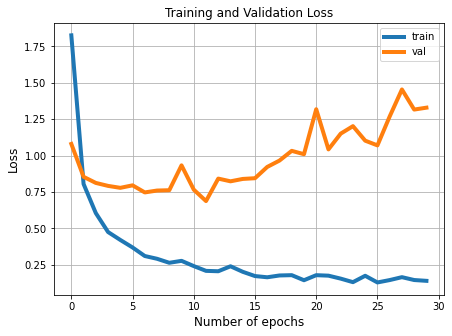

In [93]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()


In [94]:
score,acc = vggnet_model.evaluate(X_test,Y_test)
print(score,acc)

246/246 [==============================] - 3s 13ms/step - loss: 1.2860 - accuracy: 0.8629
1.2859686613082886 0.8629176020622253


In [95]:
from PIL import Image
import matplotlib.image as mpimg
import cv2

In [104]:
label_map = ['20_speed','30_speed','50_speed','60_speed','70_speed','80_speed','80_lifted','100_speed','120_speed','no_overtaking_general',
'no_overtaking_trucks','right_of_way_crossing','right_of_way_general','give_way','stop','no_way_general','no_way_trucks',
'no_way_one_way','attention_general','attention_left_turn','attention_right_turn','attention_curvy','attention_bumpers','attention_slippery',
'attention_bottleneck','attention_construction','attention_traffic_light','attention_pedestrian','attention_children',
'attention_bikes','attention_snowflake','attention_deer','lifted_general','turn_right','turn_left','turn_straight','turn_straight_right','turn_straight_left',
'turn_right_down','turn_left_down','turn_circle','lifted_no_overtaking_general','lifted_no_overtaking_trucks']

In [105]:
len(label_map)

43

1
30_speed


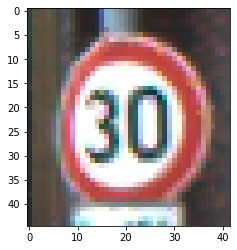

In [113]:
img_test = cv2.imread(r'Test\00001.png')
img_resize = cv2.resize(img_test,(32,32))
plt.imshow(mpimg.imread(r'Test\00001.png'))
# img_scaled = img_resize/255
img_reshaped = np.reshape(img_resize,[1,32,32,3])
input_pred = vggnet_model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)
print(label_map[input_label])

33
turn_right


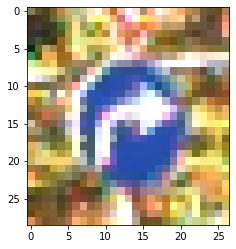

In [112]:
img_test = cv2.imread(r'Test\00003.png')
img_resize = cv2.resize(img_test,(32,32))
plt.imshow(mpimg.imread(r'Test\00003.png'))
# img_scaled = img_resize/255
img_reshaped = np.reshape(img_resize,[1,32,32,3])
input_pred = vggnet_model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)
print(label_map[input_label])

4
70_speed


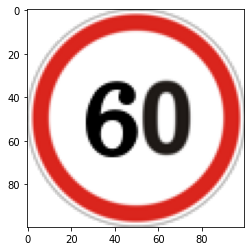

In [116]:
img_test = cv2.imread(r'Meta\3.png')
img_resize = cv2.resize(img_test,(32,32))
plt.imshow(mpimg.imread(r'Meta\3.png'))
# img_scaled = img_resize/255
img_reshaped = np.reshape(img_resize,[1,32,32,3])
input_pred = vggnet_model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)
print(label_map[input_label])